<a href="https://colab.research.google.com/github/ELISA1220/113-2Programming-language/blob/main/W5_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files

uploaded = files.upload()

Saving exercise_dataset.csv to exercise_dataset (1).csv


In [14]:
import pandas as pd

# 讀取上傳的 CSV 檔案
df = pd.read_csv("/content/exercise_dataset.csv")

df

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,0.721008
244,"Cleaning, dusting",148,176,204,233,0.515199
245,Taking out trash,177,211,245,279,0.617427
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236


In [15]:
Activity = df[df['Activity, Exercise or Sport (1 hour)'] == 'General housework']

In [16]:
Activity

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
224,General housework,207,246,286,326,0.721008


In [17]:
Ac_items = pd.concat([Activity['130 lb'], Activity['155 lb'], Activity['180 lb']])

In [8]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)



# 連接 Google Drive
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/13KB7fyiSauTRXL7jdWCzzAH4dFzbyA16QMRp3vE21U8/edit?usp=sharing')


In [18]:
gsheets

<Spreadsheet 'W5_HW' id:13KB7fyiSauTRXL7jdWCzzAH4dFzbyA16QMRp3vE21U8>

In [35]:
from gspread_dataframe import set_with_dataframe
# 選擇要更新的工作表（選擇第一個工作表）
worksheet = gsheets.get_worksheet(0)

NameError: name 'spreadsheet' is not defined

In [25]:
worksheet

<Worksheet '工作表1' id:0>

In [26]:
# 取得 Google Sheets 內容
data = worksheet.get_all_values()  # 取得所有儲存格資料，回傳為 2D 陣列
df = pd.DataFrame(data)

In [36]:
# 設定第一列為標題
df.columns = df.iloc[0]  # 第一列作為欄位名稱
df = df[1:]  # 刪除原來的第一列

In [37]:
df

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
1,"Cycling, mountain bike, bmx",502,598,695,791,1.750729719
2,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.8232356299
3,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294973528
4,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853445
5,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825266
...,...,...,...,...,...,...
244,General cleaning,207,246,286,326,0.7210081791
245,"Cleaning, dusting",148,176,204,233,0.5151992716
246,Taking out trash,177,211,245,279,0.6174267224
247,"Walking, pushing a wheelchair",236,281,327,372,0.8232356299


In [44]:
Act1 = df[df['Activity, Exercise or Sport (1 hour)'] == 'General housework']
Act2 = df[df['Activity, Exercise or Sport (1 hour)'] == 'Mild stretching']
Act3 = df[df['Activity, Exercise or Sport (1 hour)'] == 'General cleaning']

In [52]:
GH = Act1[['130 lb', '155 lb', '180 lb']]
MS = Act2[['130 lb', '155 lb', '180 lb']]
GC = Act3[['130 lb', '155 lb', '180 lb']]

In [53]:
GH

,130 lb,155 lb,180 lb
225,207,246,286


In [54]:
MS

,130 lb,155 lb,180 lb
32,148,176,204


In [55]:
GC

,130 lb,155 lb,180 lb
244,207,246,286


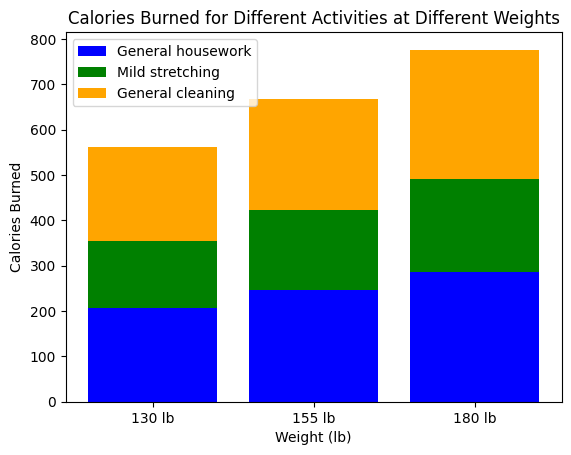

In [64]:
# 讀取 GH、MS、GC 的卡路里數據，並確保資料是一維的
GH = df.loc[df['Activity, Exercise or Sport (1 hour)'] == 'General housework', ['130 lb', '155 lb', '180 lb']]
MS = df.loc[df['Activity, Exercise or Sport (1 hour)'] == 'Mild stretching', ['130 lb', '155 lb', '180 lb']]
GC = df.loc[df['Activity, Exercise or Sport (1 hour)'] == 'General cleaning', ['130 lb', '155 lb', '180 lb']]

# 確保數據是正確的數值型態
GH = GH.to_numpy().flatten().astype(float)
MS = MS.to_numpy().flatten().astype(float)
GC = GC.to_numpy().flatten().astype(float)

# X 軸標籤（不同體重）
labels = ['130 lb', '155 lb', '180 lb']
x = np.arange(len(labels))  # X 軸索引

# 繪製堆疊長條圖
plt.bar(x, GH, label='General housework', color='blue')
plt.bar(x, MS, bottom=GH, label='Mild stretching', color='green')
plt.bar(x, GC, bottom=GH + MS, label='General cleaning', color='orange')

# 設定 X 軸與 Y 軸標籤
plt.xlabel('Weight (lb)')
plt.ylabel('Calories Burned')
plt.title('Calories Burned for Different Activities at Different Weights')

# 設定 X 軸刻度與對應的標籤
plt.xticks(x, labels)

# 顯示圖例
plt.legend()

# 顯示圖表
plt.show()

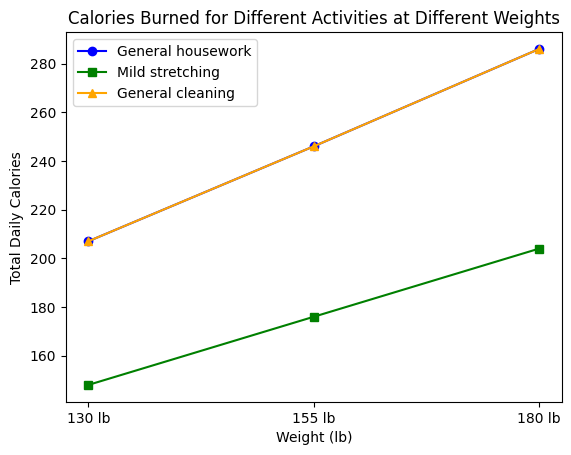

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# 讀取 GH、MS、GC 的卡路里數據，並確保資料是一維的
GH = df.loc[df['Activity, Exercise or Sport (1 hour)'] == 'General housework', ['130 lb', '155 lb', '180 lb']]
MS = df.loc[df['Activity, Exercise or Sport (1 hour)'] == 'Mild stretching', ['130 lb', '155 lb', '180 lb']]
GC = df.loc[df['Activity, Exercise or Sport (1 hour)'] == 'General cleaning', ['130 lb', '155 lb', '180 lb']]

# 確保數據是正確的數值型態
GH = GH.to_numpy().flatten().astype(float)
MS = MS.to_numpy().flatten().astype(float)
GC = GC.to_numpy().flatten().astype(float)

# X 軸標籤（不同體重）
labels = ['130 lb', '155 lb', '180 lb']
x = np.arange(len(labels))  # X 軸索引

# 繪製折線圖
plt.plot(x, GH, marker='o', linestyle='-', color='blue', label='General housework')
plt.plot(x, MS, marker='s', linestyle='-', color='green', label='Mild stretching')
plt.plot(x, GC, marker='^', linestyle='-', color='orange', label='General cleaning')

# 設定 X 軸與 Y 軸標籤
plt.xlabel("Weight (lb)")   # x 軸標籤
plt.ylabel("Total Daily Calories")   # y 軸標籤
plt.title("Calories Burned for Different Activities at Different Weights")

# 設定 X 軸刻度與對應的標籤
plt.xticks(x, labels)

# 顯示圖例
plt.legend()

# 顯示圖表
plt.show()